# Explore here

In [58]:
# Your code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [60]:
df['date'] = pd.to_datetime(df['date'])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    366 non-null    datetime64[ns]
 1   sales   366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [62]:
df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [63]:
df['date'] = df['date'].dt.date

In [64]:
df = df.set_index('date')
df

,sales
date,
2022-09-03,55.292157
2022-09-04,53.803211
2022-09-05,58.141693
2022-09-06,64.530899
2022-09-07,66.013633
...,...
2023-08-30,989.600354
2023-08-31,994.987326
2023-09-01,995.814415


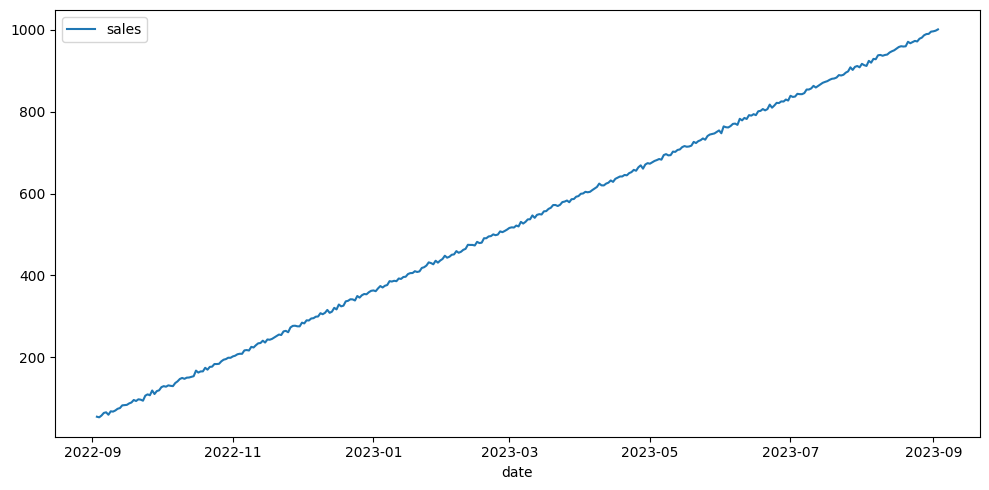

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(10,5))
sns.lineplot(data=df)

plt.tight_layout()
plt.show()

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposicion = seasonal_decompose(df,period=30)


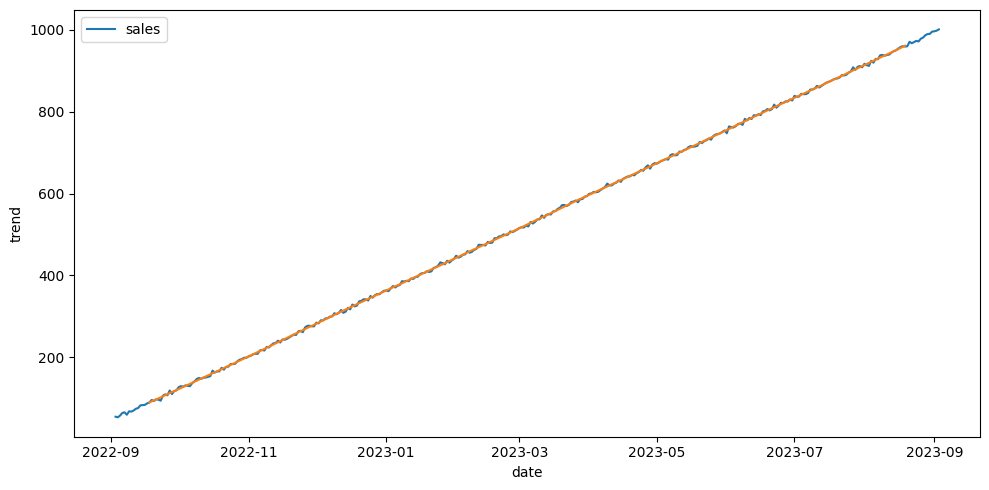

In [67]:
trend = decomposicion.trend

plt.subplots(figsize=(10,5))
sns.lineplot(data=df)
sns.lineplot(data=trend)

plt.tight_layout()
plt.show()

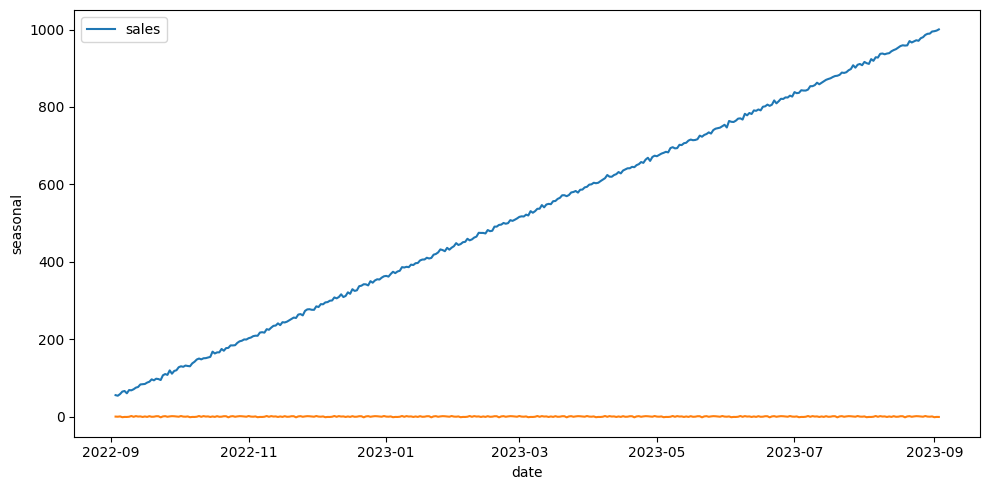

In [68]:
estacional = decomposicion.seasonal

plt.subplots(figsize=(10,5))
sns.lineplot(data=df)
sns.lineplot(data=estacional)

plt.tight_layout()
plt.show()

In [69]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(df)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

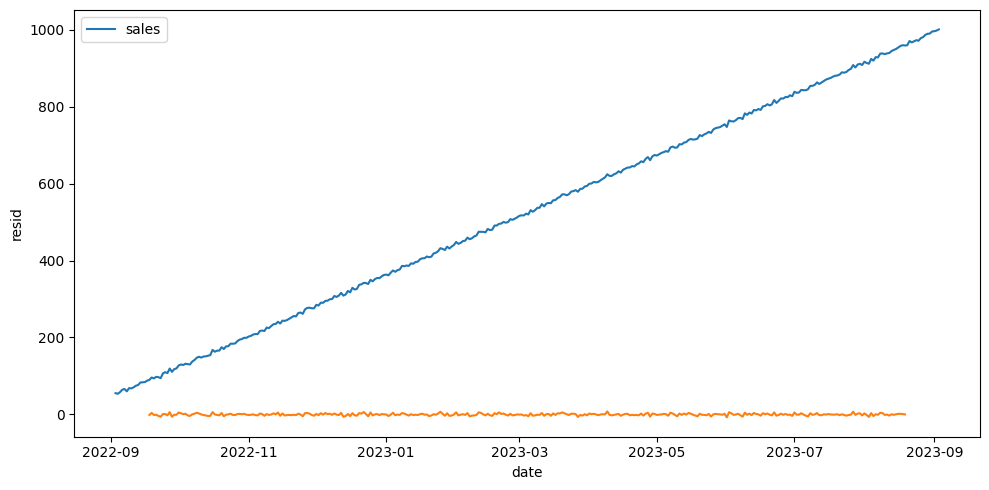

In [70]:
residuos = decomposicion.resid

plt.subplots(figsize=(10,5))
sns.lineplot(data=df)
sns.lineplot(data=residuos)

plt.tight_layout()
plt.show()

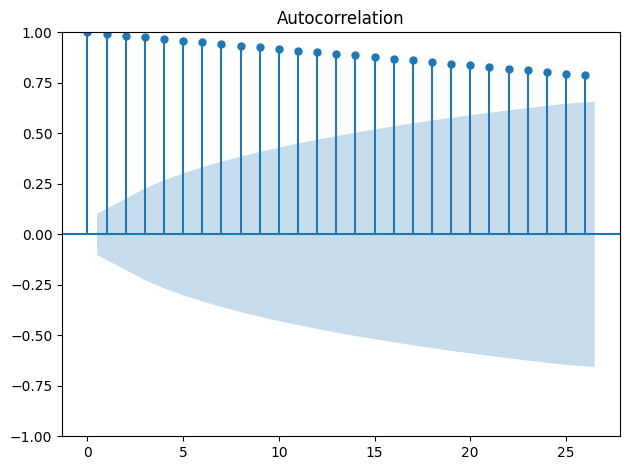

In [71]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df)
plt.tight_layout()
plt.show()

In [72]:
df_stationary = df.diff().dropna()
test_stationarity(df_stationary)


Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [73]:
from pmdarima import auto_arima

model = auto_arima(df_stationary,seasonal=True,trace=True,m=7)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2096.542, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=1966.396, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2209.657, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=1970.972, Time=0.04 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=1968.120, Time=0.25 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=1968.220, Time=0.19 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=1966.919, Time=0.11 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=1965.376, Time=0.65 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=1965.211, Time=0.97 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=1963.937, Time=0.64 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=1967.822, Time=0.24 sec
 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=2094.918, Time=0.55 sec
 ARIMA(2,0,0)(1,0,2)[7] intercept   : AIC=1

In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  365
Model:             SARIMAX(3, 0, 1)x(0, 0, 1, 7)   Log Likelihood                -911.892
Date:                           Sat, 11 May 2024   AIC                           1837.785
Time:                                   01:09:33   BIC                           1865.084
Sample:                               09-04-2022   HQIC                          1848.634
                                    - 09-03-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2873      0.259      8.827      0.000       1.779       2.795
ar.L1         -0.0458      0.053     -0.868      0.386      -0.149       0.058
ar.L2          0.0793      0.057      1.379      0.168      -0.033       0.192
ar.L3          0.0868      0.054      1.617      0.106      -0.018       0.192
ma.L1         -0.9897      0.022    -44.347      0.000      -1.033      -0.946
ma.S.L7        0.1250      0.053      2.350      0.019       0.021       0.229
sigma2         8.5685      0.674     12.705      0.000       7.247       9.890
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.93   Prob(JB):                         0.73
Heteroskedasticity (H):               0.86   Skew:                             0.06
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
train_df = df_stationary[(df_stationary.index>pd.to_datetime('2023-07-25').date()) &(df_stationary.index<pd.to_datetime('2023-08-25').date())]
test_df = df_stationary[df_stationary.index>=pd.to_datetime('2023-08-25').date()]


In [76]:
test_df

,sales
date,
2023-08-25,-1.362901
2023-08-26,6.698026
2023-08-27,2.597694
2023-08-28,5.902782
2023-08-29,2.837036
2023-08-30,0.518681
2023-08-31,5.386972
2023-09-01,0.827090
2023-09-02,1.535798


In [77]:
model = auto_arima(train_df,seasonal=True,trace=True,m=7)

Performing stepwise search to minimize aic


 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=221.742, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=234.826, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=221.766, Time=0.04 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=245.437, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[7] intercept   : AIC=219.965, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[7] intercept   : AIC=218.653, Time=0.08 sec
 ARIMA(2,0,2)(1,0,0)[7] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=216.656, Time=0.06 sec
 ARIMA(2,0,1)(1,0,0)[7] intercept   : AIC=214.924, Time=0.28 sec
 ARIMA(2,0,1)(2,0,0)[7] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,1)(1,0,1)[7] intercept   : AIC=219.754, Time=0.47 sec
 ARIMA(2,0,1)(0,0,1)[7] intercept   : AIC=217.965, Time=0.11 sec
 ARIMA(2,0,1)(2,0,1)[7] intercept   : AIC=221.627, Time=0.35 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC

In [78]:
forecast = model.predict(10)


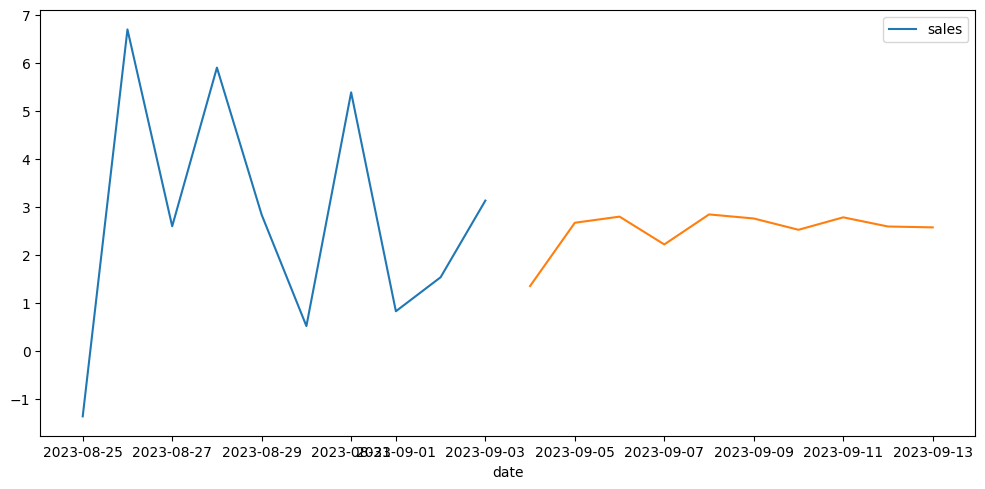

In [79]:
plt.subplots(figsize=(10,5))
sns.lineplot(data=test_df)
sns.lineplot(data=forecast)

plt.tight_layout()
plt.show()

In [80]:
from sklearn.metrics import mean_squared_error,r2_score

mean_squared_error(test_df,forecast)
r2_score(test_df,forecast)

0.06734879796909798

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=1796.137, Time=1.22 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2045.823, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1918.834, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2153.559, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=1792.569, Time=0.69 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=1795.990, Time=0.22 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=inf, Time=2.11 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=1791.806, Time=1.27 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=1793.442, Time=1.40 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=1792.945, Time=2.23 sec
 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=1790.301, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=1796.944, Time=0.15 sec
 ARIMA(1,1,2)(2,0,0)[7] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=inf, T

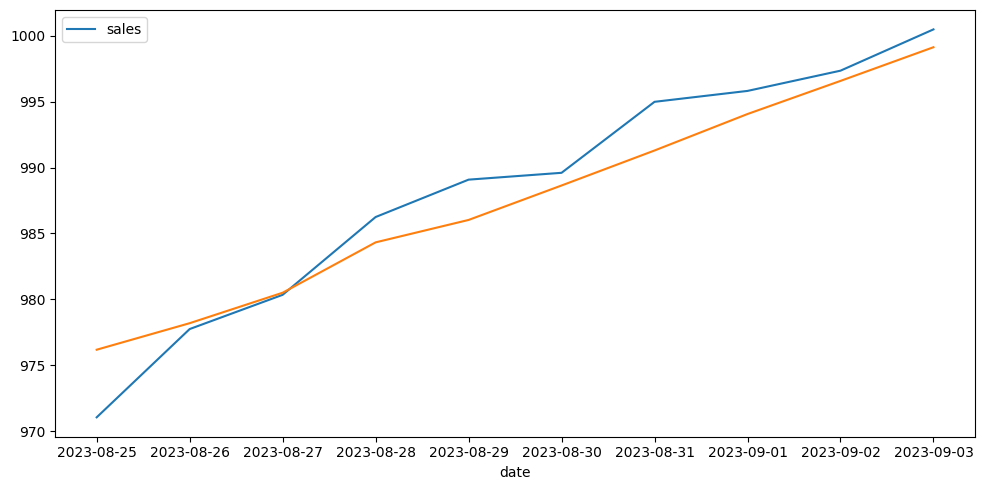

In [84]:
train_df = df[df.index<pd.to_datetime('2023-08-25').date()]
test_df = df[df.index>=pd.to_datetime('2023-08-25').date()]

model = auto_arima(train_df,seasonal=True,trace=True,m=7)
forecast = model.predict(10)

plt.subplots(figsize=(10,5))
sns.lineplot(data=test_df)
sns.lineplot(data=forecast)

plt.tight_layout()
plt.show()

In [85]:
mean_squared_error(test_df,forecast)


5.966550067553355

In [86]:
r2_score(test_df,forecast)

0.9263828922018011

In [87]:
from pickle import dump

dump(model,open('../models/model_serie_temporal1.model','wb'))